In [2]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Increase the maximum field size
import csv
#csv.field_size_limit(10000000000)

import warnings
warnings.filterwarnings("ignore")

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/zomato.csv', encoding='ISO-8859-1', error_bad_lines=False)  ## change to where your file is

In [5]:
#Text Mining

from wordcloud import WordCloud
import random

In [5]:
# Preprocess the text data
all_reviews = ' '.join(df['reviews_list'].dropna())
all_reviews = all_reviews.lower()  # convert text to lowercase
all_reviews = ''.join(c for c in all_reviews if c.isalpha() or c.isspace())  # remove punctuation
stopwords = set(['the', 'and', 'a', 'in', 'to','of', 'it', 'for', 'with', 'on', 'is', 'was', 'were',
                 'this', 'that', 'at', 'but', 'not', 'we', 'you', 'i', 'they', 'he','she', 'can',
                 'will', 'would', 'should', 'has', 'have', 'had', 'rated', 'ratedn', 'went', 'good'])  # define stop words
all_reviews = ' '.join(w for w in all_reviews.split() if w not in stopwords)  # remove stop words

In [6]:
# Split the reviews into words
words = all_reviews.split()

In [7]:
# Count the frequency of each pair of adjacent words
word_pairs = {}
for i in range(len(words)-1):
    pair = f'{words[i]} {words[i+1]}'
    if pair in word_pairs:
        word_pairs[pair] += 1
    else:
        word_pairs[pair] = 1


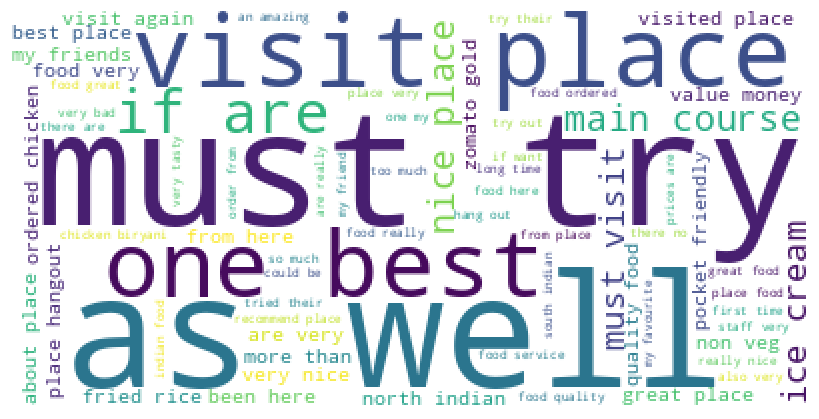

In [8]:
# REVIEWS

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create a word cloud object and generate the cloud
wordcloud_pair = WordCloud(background_color='white', max_words=200)
wordcloud_pair.generate_from_frequencies(word_pairs)
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_pair)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [9]:
# Print the top 20 word pairs by frequency
for pair, frequency in sorted(word_pairs.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f'{pair}: {frequency}')

must try: 59978
as well: 57898
visit place: 45248
one best: 39309
if are: 35724
main course: 35723
nice place: 35424
ice cream: 30809
must visit: 30075
great place: 28545
non veg: 27122
north indian: 26804
visited place: 26225
visit again: 25753
my friends: 23727
been here: 23071
are very: 22796
ordered chicken: 22352
value money: 21685
zomato gold: 21650


In [10]:
# Split the reviews into groups of 4 words
word_groups = [f'{words[i]} {words[i+1]} {words[i+2]} {words[i+3]}' for i in range(len(words)-3)]


In [11]:
# Count the frequency of each group of 4 words
word_quadgrams = {}
for group in word_groups:
    if group in word_quadgrams:
        word_quadgrams[group] += 1
    else:
        word_quadgrams[group] = 1

In [12]:
# Create a word cloud object and generate the cloud
wordcloud_quad = WordCloud(background_color='white', max_words=200)
wordcloud_quad.generate_from_frequencies(word_quadgrams)

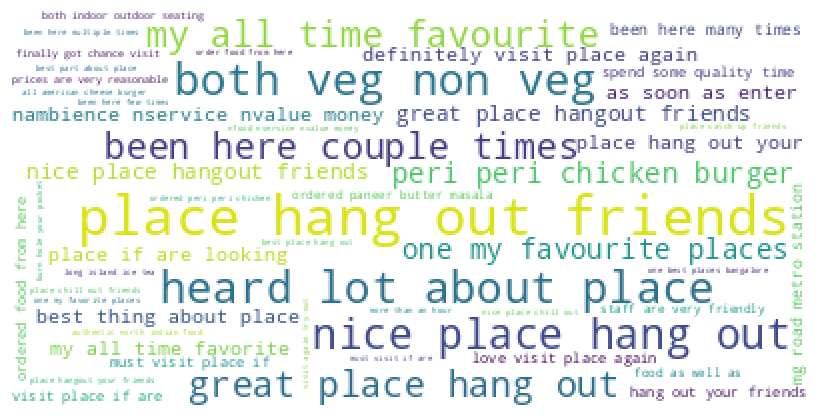

In [13]:
# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_quad)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
# Print the top 20 word quadgrams by frequency
for group, frequency in sorted(word_quadgrams.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f'{group}: {frequency}')

place hang out friends: 4105
heard lot about place: 2621
both veg non veg: 2541
nice place hang out: 2394
been here couple times: 1659
great place hang out: 1622
my all time favourite: 1558
peri peri chicken burger: 1446
one my favourite places: 1400
great place hangout friends: 1385
nice place hangout friends: 1359
definitely visit place again: 1271
place if are looking: 1192
my all time favorite: 1084
as soon as enter: 1051
nambience nservice nvalue money: 1047
best thing about place: 1043
place hang out your: 985
been here many times: 965
mg road metro station: 946


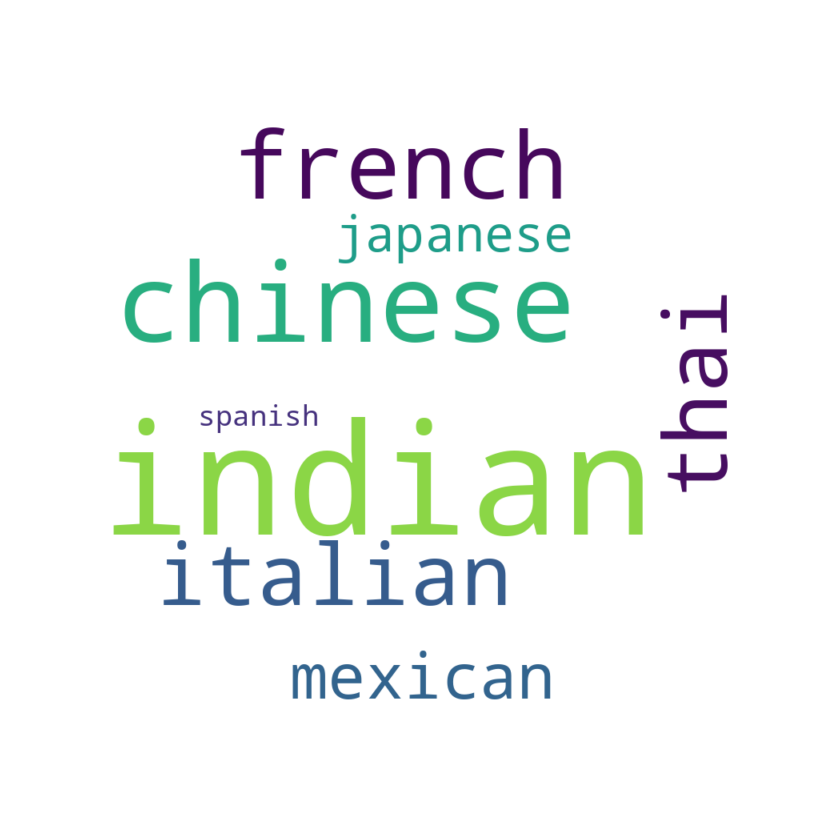

In [6]:
# MOST LISTED CUISINES IN THE MARKET

import pandas as pd
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


# First, concatenate all review text.
all_cuisine_text = ' '.join(df['reviews_list'].astype(str).tolist()).lower()

# Tokenize the text into words.
words = all_cuisine_text.split()

# Perform frequency analysis on the words.
word_counts = Counter(words)

# If you have a list of specific cuisine types you are interested in, filter the counts.
cuisines_of_interest = {'indian', 'chinese', 'italian', 'mexican', 'japanese', 'thai', 'french', 'spanish'}
cuisine_counts = {word: count for word, count in word_counts.items() if word in cuisines_of_interest}

# Generate a circle mask
def create_circle_mask():
    x, y = np.ogrid[:1000, :1000]
    center_x, center_y = 500, 500
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 > 430 ** 2
    mask = 255 * mask.astype(int)
    return mask

# Circle mask
circle_mask = create_circle_mask()

# Create a word cloud with the circular mask
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=circle_mask).generate_from_frequencies(cuisine_counts)

# Display the word cloud using matplotlib.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# Display the most common cuisines.
for cuisine, count in most_common_cuisines:
    print(f"{cuisine}: {count}")


indian: 33828
chinese: 14300
french: 9836
thai: 8510
italian: 8125
mexican: 4251
japanese: 2216
spanish: 333


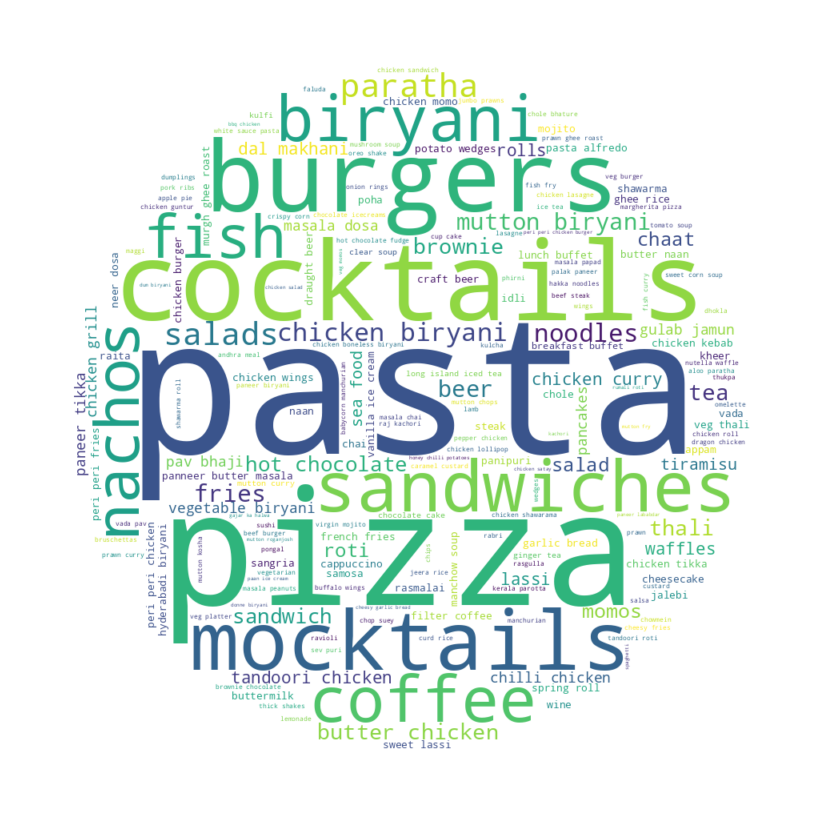

In [ ]:
# DISH LIKED THAT IS MENTIONED MOST

import pandas as pd
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Replace this with loading your actual dataframe
# For example, if you have a CSV file with the data:
# df = pd.read_csv('path_to_your_csv.csv')



# Concatenate all text from 'dish_liked' column and convert to lowercase.
all_dishes_text = ' '.join(df['dish_liked'].astype(str).tolist()).lower()

# Tokenize the text by splitting on commas followed by space.
dishes = all_dishes_text.split(', ')

# Perform frequency analysis on the dishes.
dish_counts = Counter(dishes)

# Function to create a circle mask
def create_circle_mask():
    x, y = np.ogrid[:1000, :1000]
    center_x, center_y = 500, 500
    mask = (x - center_x) ** 2 + (y - center_y) ** 2 > 430 ** 2
    mask = 255 * mask.astype(int)
    return mask

# Create the circle mask for the word cloud
circle_mask = create_circle_mask()

# Create the word cloud with the circular mask using the frequencies
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=circle_mask).generate_from_frequencies(dish_counts)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off axis labels
plt.tight_layout(pad=0)
plt.show()
